This notebook uses [PyTorch](https://pytorch.org/), which is a library that can automatically differentiate functions and is commonly used to implement neural networks. Because of its capability to automatically differentiate functions, the formula for the gradient does not need to be manually derived -- this comes especially handy when working with neural networks, whose gradient formula can be quite complicated, especially for complex architectures. 

We recommend going over the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) and then the starter code below. For any new functions that you come across, you can look up the documentation [here](https://pytorch.org/docs/stable/index.html). 

We recommend running this notebook on Google Colab to avoid having to install PyTorch and to take advantage of GPUs, which make training faster.

## **Part 1 – No hidden layer**

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
 class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784, out_features = 2), # no hidden layer 28*28 ->784
                )
                
            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784))) # no hidden layer 28*28 ->784
                return encoded_x
            
        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 2, out_features = 784), # no hidden layer 28*28 ->784
                  nn.Sigmoid()
                )
                
            def forward(self, z):
                # needs your implementation
                decoded_z = self.layers(z)
                one_d_z = decoded_z.shape[0]
                output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
                return output_img
            
        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    # def add_noise(self, x, noise_type):
    #     if noise_type=='Gaussian':
    #         # return (x with Gaussian noise)
    #     elif noise_type=='Dropout':
    #         # return (x with Dropout noise)

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:15<00:00, 124.06it/s]

====> Epoch: 1 Average loss: 0.8993



100%|██████████| 313/313 [00:02<00:00, 140.85it/s]

====> Val set loss (reconstruction error) : 0.7910



100%|██████████| 1875/1875 [00:15<00:00, 124.35it/s]

====> Epoch: 2 Average loss: 0.7757



100%|██████████| 313/313 [00:02<00:00, 139.65it/s]

====> Val set loss (reconstruction error) : 0.7617



100%|██████████| 1875/1875 [00:15<00:00, 124.31it/s]

====> Epoch: 3 Average loss: 0.7580



100%|██████████| 313/313 [00:02<00:00, 138.66it/s]

====> Val set loss (reconstruction error) : 0.7515



100%|██████████| 1875/1875 [00:15<00:00, 120.91it/s]

====> Epoch: 4 Average loss: 0.7517



100%|██████████| 313/313 [00:02<00:00, 138.81it/s]

====> Val set loss (reconstruction error) : 0.7486



100%|██████████| 1875/1875 [00:15<00:00, 122.30it/s]

====> Epoch: 5 Average loss: 0.7496



100%|██████████| 313/313 [00:02<00:00, 138.31it/s]

====> Val set loss (reconstruction error) : 0.7468



100%|██████████| 1875/1875 [00:15<00:00, 121.14it/s]

====> Epoch: 6 Average loss: 0.7479



100%|██████████| 313/313 [00:02<00:00, 137.57it/s]

====> Val set loss (reconstruction error) : 0.7452



100%|██████████| 1875/1875 [00:15<00:00, 121.91it/s]

====> Epoch: 7 Average loss: 0.7469



100%|██████████| 313/313 [00:02<00:00, 135.52it/s]

====> Val set loss (reconstruction error) : 0.7449



100%|██████████| 1875/1875 [00:15<00:00, 121.72it/s]

====> Epoch: 8 Average loss: 0.7466



100%|██████████| 313/313 [00:02<00:00, 136.72it/s]

====> Val set loss (reconstruction error) : 0.7447



100%|██████████| 1875/1875 [00:15<00:00, 122.08it/s]

====> Epoch: 9 Average loss: 0.7465



100%|██████████| 313/313 [00:02<00:00, 137.80it/s]

====> Val set loss (reconstruction error) : 0.7446



100%|██████████| 1875/1875 [00:15<00:00, 123.18it/s]

====> Epoch: 10 Average loss: 0.7464



100%|██████████| 313/313 [00:02<00:00, 138.70it/s]

====> Val set loss (reconstruction error) : 0.7446



100%|██████████| 1875/1875 [00:15<00:00, 123.38it/s]

====> Epoch: 11 Average loss: 0.7463



100%|██████████| 313/313 [00:02<00:00, 139.14it/s]

====> Val set loss (reconstruction error) : 0.7446



100%|██████████| 1875/1875 [00:15<00:00, 123.62it/s]

====> Epoch: 12 Average loss: 0.7463



100%|██████████| 313/313 [00:02<00:00, 140.37it/s]

====> Val set loss (reconstruction error) : 0.7446



100%|██████████| 1875/1875 [00:15<00:00, 122.29it/s]

====> Epoch: 13 Average loss: 0.7463



100%|██████████| 313/313 [00:02<00:00, 137.92it/s]

====> Val set loss (reconstruction error) : 0.7446



100%|██████████| 1875/1875 [00:15<00:00, 123.00it/s]

====> Epoch: 14 Average loss: 0.7462



100%|██████████| 313/313 [00:02<00:00, 139.82it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 123.51it/s]

====> Epoch: 15 Average loss: 0.7462



100%|██████████| 313/313 [00:02<00:00, 138.82it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 122.21it/s]

====> Epoch: 16 Average loss: 0.7462



100%|██████████| 313/313 [00:02<00:00, 138.71it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 123.49it/s]

====> Epoch: 17 Average loss: 0.7462



100%|██████████| 313/313 [00:02<00:00, 137.78it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 123.52it/s]

====> Epoch: 18 Average loss: 0.7461



100%|██████████| 313/313 [00:02<00:00, 137.94it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 122.02it/s]

====> Epoch: 19 Average loss: 0.7461



100%|██████████| 313/313 [00:02<00:00, 137.30it/s]

====> Val set loss (reconstruction error) : 0.7445



100%|██████████| 1875/1875 [00:15<00:00, 123.15it/s]

====> Epoch: 20 Average loss: 0.7461



100%|██████████| 313/313 [00:02<00:00, 137.20it/s]

====> Val set loss (reconstruction error) : 0.7445


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


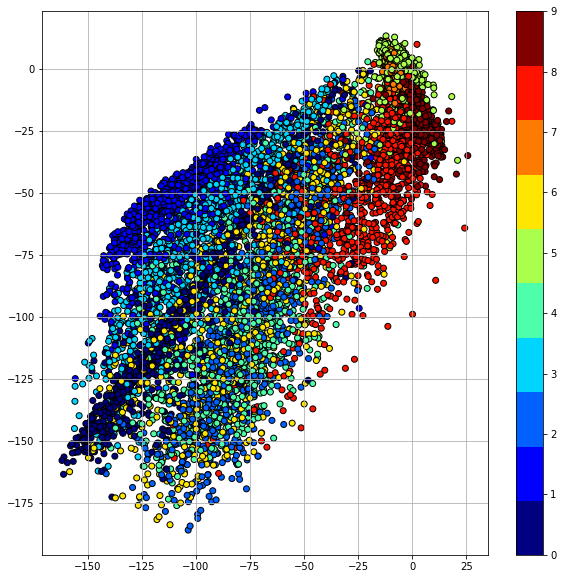

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


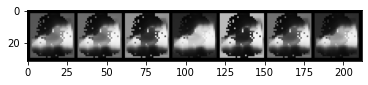

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


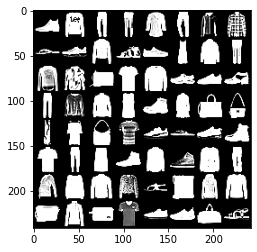

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


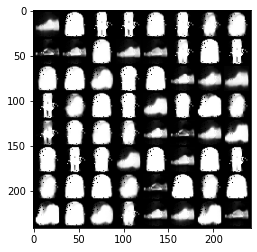

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

## **Part 2 – Two layers**

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784, out_features = 1024), # 1st layer
                  nn.ReLU(),
                  nn.Linear(in_features =1024, out_features = 2) # 2nd layer
                )
                
            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784)))
                return encoded_x
            
        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 2, out_features = 1024), # 1st layer
                  nn.ReLU(),
                  nn.Linear(in_features = 1024, out_features = 784), # 2nd layer
                  nn.Sigmoid()
                )
                
            def forward(self, z):
                # needs your implementation
                decoded_z = self.layers(z)
                one_d_z = decoded_z.shape[0]
                output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
                return output_img
            
        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    # def add_noise(self, x, noise_type):
    #     if noise_type=='Gaussian':
    #         # return (x with Gaussian noise)
    #     elif noise_type=='Dropout':
    #         # return (x with Dropout noise)

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:56<00:00, 33.27it/s]

====> Epoch: 1 Average loss: 0.6926



100%|██████████| 313/313 [00:03<00:00, 93.14it/s]

====> Val set loss (reconstruction error) : 0.6713



100%|██████████| 1875/1875 [01:00<00:00, 31.13it/s]

====> Epoch: 2 Average loss: 0.6673



100%|██████████| 313/313 [00:03<00:00, 96.94it/s]

====> Val set loss (reconstruction error) : 0.6603



100%|██████████| 1875/1875 [00:59<00:00, 31.25it/s]

====> Epoch: 3 Average loss: 0.6589



100%|██████████| 313/313 [00:03<00:00, 93.84it/s]

====> Val set loss (reconstruction error) : 0.6559



100%|██████████| 1875/1875 [01:00<00:00, 31.11it/s]

====> Epoch: 4 Average loss: 0.6560



100%|██████████| 313/313 [00:03<00:00, 90.49it/s]

====> Val set loss (reconstruction error) : 0.6548



100%|██████████| 1875/1875 [01:00<00:00, 31.20it/s]

====> Epoch: 5 Average loss: 0.6543



100%|██████████| 313/313 [00:03<00:00, 95.37it/s]

====> Val set loss (reconstruction error) : 0.6528



100%|██████████| 1875/1875 [00:58<00:00, 32.20it/s]

====> Epoch: 6 Average loss: 0.6534



100%|██████████| 313/313 [00:03<00:00, 93.33it/s]

====> Val set loss (reconstruction error) : 0.6528



100%|██████████| 1875/1875 [00:59<00:00, 31.73it/s]

====> Epoch: 7 Average loss: 0.6524



100%|██████████| 313/313 [00:03<00:00, 96.57it/s]

====> Val set loss (reconstruction error) : 0.6513



100%|██████████| 1875/1875 [00:59<00:00, 31.30it/s]

====> Epoch: 8 Average loss: 0.6519



100%|██████████| 313/313 [00:03<00:00, 94.56it/s]

====> Val set loss (reconstruction error) : 0.6505



100%|██████████| 1875/1875 [01:01<00:00, 30.68it/s]

====> Epoch: 9 Average loss: 0.6514



100%|██████████| 313/313 [00:03<00:00, 94.19it/s]

====> Val set loss (reconstruction error) : 0.6504



100%|██████████| 1875/1875 [01:01<00:00, 30.46it/s]

====> Epoch: 10 Average loss: 0.6510



100%|██████████| 313/313 [00:03<00:00, 92.18it/s]

====> Val set loss (reconstruction error) : 0.6501



100%|██████████| 1875/1875 [01:02<00:00, 30.01it/s]

====> Epoch: 11 Average loss: 0.6508



100%|██████████| 313/313 [00:03<00:00, 91.94it/s] 

====> Val set loss (reconstruction error) : 0.6502



100%|██████████| 1875/1875 [01:03<00:00, 29.31it/s]

====> Epoch: 12 Average loss: 0.6506



100%|██████████| 313/313 [00:03<00:00, 93.57it/s]

====> Val set loss (reconstruction error) : 0.6495



100%|██████████| 1875/1875 [01:02<00:00, 30.15it/s]

====> Epoch: 13 Average loss: 0.6502



100%|██████████| 313/313 [00:03<00:00, 96.26it/s] 

====> Val set loss (reconstruction error) : 0.6509



100%|██████████| 1875/1875 [01:02<00:00, 29.92it/s]

====> Epoch: 14 Average loss: 0.6499



100%|██████████| 313/313 [00:03<00:00, 95.40it/s]

====> Val set loss (reconstruction error) : 0.6495



100%|██████████| 1875/1875 [01:02<00:00, 29.94it/s]

====> Epoch: 15 Average loss: 0.6496



100%|██████████| 313/313 [00:03<00:00, 94.97it/s]

====> Val set loss (reconstruction error) : 0.6494



100%|██████████| 1875/1875 [01:03<00:00, 29.65it/s]

====> Epoch: 16 Average loss: 0.6494



100%|██████████| 313/313 [00:03<00:00, 93.68it/s]

====> Val set loss (reconstruction error) : 0.6486



100%|██████████| 1875/1875 [01:03<00:00, 29.41it/s]

====> Epoch: 17 Average loss: 0.6491



100%|██████████| 313/313 [00:03<00:00, 95.02it/s]

====> Val set loss (reconstruction error) : 0.6493



100%|██████████| 1875/1875 [01:03<00:00, 29.55it/s]

====> Epoch: 18 Average loss: 0.6490



100%|██████████| 313/313 [00:03<00:00, 96.64it/s]

====> Val set loss (reconstruction error) : 0.6488



100%|██████████| 1875/1875 [01:02<00:00, 29.81it/s]

====> Epoch: 19 Average loss: 0.6489



100%|██████████| 313/313 [00:03<00:00, 94.54it/s] 

====> Val set loss (reconstruction error) : 0.6488



100%|██████████| 1875/1875 [01:02<00:00, 29.78it/s]

====> Epoch: 20 Average loss: 0.6488



100%|██████████| 313/313 [00:03<00:00, 95.71it/s] 

====> Val set loss (reconstruction error) : 0.6491


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


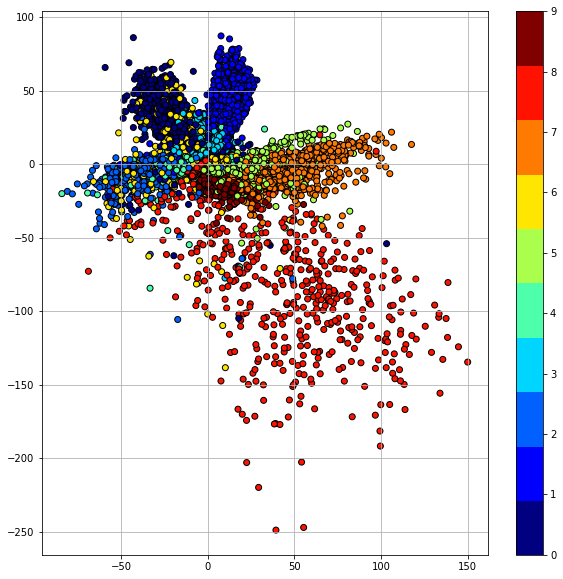

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


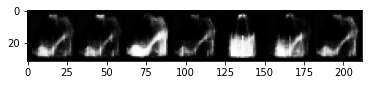

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


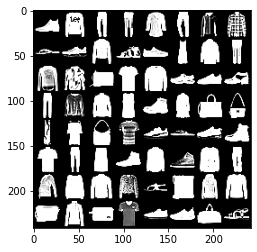

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


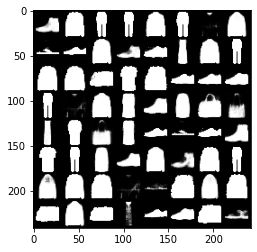

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

## **Part 3 - No added noise**

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784, out_features = dim_latent_representation), # no hidden layer 28*28 ->784
                  nn.Tanh() # tanh activation function
                )
                
            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784))) # no hidden layer 28*28 ->784
                return encoded_x
            
        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = dim_latent_representation, out_features = 784), # no hidden layer 28*28 ->784
                  nn.Tanh()
                )
                
            def forward(self, z):
                # needs your implementation
                decoded_z = self.layers(z)
                one_d_z = decoded_z.shape[0]
                output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
                return output_img
            
        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    # def add_noise(self, x, noise_type):
    #     if noise_type=='Gaussian':
    #         # return (x with Gaussian noise)
    #     elif noise_type=='Dropout':
    #         # return (x with Dropout noise)

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:16<00:00, 116.26it/s]

====> Epoch: 1 Average loss: 0.6132



100%|██████████| 313/313 [00:02<00:00, 136.06it/s]

====> Val set loss (reconstruction error) : 0.5422



100%|██████████| 1875/1875 [00:15<00:00, 118.84it/s]

====> Epoch: 2 Average loss: 0.5336



100%|██████████| 313/313 [00:02<00:00, 136.15it/s]

====> Val set loss (reconstruction error) : 0.5258



100%|██████████| 1875/1875 [00:15<00:00, 117.51it/s]

====> Epoch: 3 Average loss: 0.5243



100%|██████████| 313/313 [00:02<00:00, 135.64it/s]

====> Val set loss (reconstruction error) : 0.5206



100%|██████████| 1875/1875 [00:16<00:00, 115.71it/s]

====> Epoch: 4 Average loss: 0.5209



100%|██████████| 313/313 [00:02<00:00, 134.17it/s]

====> Val set loss (reconstruction error) : 0.5193



100%|██████████| 1875/1875 [00:16<00:00, 115.34it/s]

====> Epoch: 5 Average loss: 0.5192



100%|██████████| 313/313 [00:02<00:00, 135.99it/s]

====> Val set loss (reconstruction error) : 0.5183



100%|██████████| 1875/1875 [00:16<00:00, 116.45it/s]

====> Epoch: 6 Average loss: 0.5183



100%|██████████| 313/313 [00:02<00:00, 134.94it/s]

====> Val set loss (reconstruction error) : 0.5179



100%|██████████| 1875/1875 [00:16<00:00, 116.73it/s]

====> Epoch: 7 Average loss: 0.5178



100%|██████████| 313/313 [00:02<00:00, 136.94it/s]

====> Val set loss (reconstruction error) : 0.5178



100%|██████████| 1875/1875 [00:16<00:00, 116.03it/s]

====> Epoch: 8 Average loss: 0.5175



100%|██████████| 313/313 [00:02<00:00, 133.62it/s]

====> Val set loss (reconstruction error) : 0.5178



100%|██████████| 1875/1875 [00:16<00:00, 116.57it/s]

====> Epoch: 9 Average loss: 0.5172



100%|██████████| 313/313 [00:02<00:00, 136.65it/s]

====> Val set loss (reconstruction error) : 0.5180



100%|██████████| 1875/1875 [00:16<00:00, 117.05it/s]

====> Epoch: 10 Average loss: 0.5170



100%|██████████| 313/313 [00:02<00:00, 137.18it/s]

====> Val set loss (reconstruction error) : 0.5177



100%|██████████| 1875/1875 [00:16<00:00, 116.67it/s]

====> Epoch: 11 Average loss: 0.5168



100%|██████████| 313/313 [00:02<00:00, 134.73it/s]

====> Val set loss (reconstruction error) : 0.5172



100%|██████████| 1875/1875 [00:16<00:00, 115.65it/s]

====> Epoch: 12 Average loss: 0.5166



100%|██████████| 313/313 [00:02<00:00, 133.66it/s]

====> Val set loss (reconstruction error) : 0.5170



100%|██████████| 1875/1875 [00:16<00:00, 115.24it/s]

====> Epoch: 13 Average loss: 0.5165



100%|██████████| 313/313 [00:02<00:00, 136.78it/s]

====> Val set loss (reconstruction error) : 0.5170



100%|██████████| 1875/1875 [00:16<00:00, 116.62it/s]

====> Epoch: 14 Average loss: 0.5164



100%|██████████| 313/313 [00:02<00:00, 133.65it/s]

====> Val set loss (reconstruction error) : 0.5169



100%|██████████| 1875/1875 [00:16<00:00, 115.46it/s]

====> Epoch: 15 Average loss: 0.5163



100%|██████████| 313/313 [00:02<00:00, 133.47it/s]

====> Val set loss (reconstruction error) : 0.5167



100%|██████████| 1875/1875 [00:16<00:00, 115.80it/s]


====> Epoch: 16 Average loss: 0.5162


100%|██████████| 313/313 [00:02<00:00, 135.03it/s]

====> Val set loss (reconstruction error) : 0.5166



100%|██████████| 1875/1875 [00:16<00:00, 115.65it/s]

====> Epoch: 17 Average loss: 0.5161



100%|██████████| 313/313 [00:02<00:00, 132.76it/s]

====> Val set loss (reconstruction error) : 0.5164



100%|██████████| 1875/1875 [00:16<00:00, 114.98it/s]

====> Epoch: 18 Average loss: 0.5161



100%|██████████| 313/313 [00:02<00:00, 136.76it/s]

====> Val set loss (reconstruction error) : 0.5164



100%|██████████| 1875/1875 [00:16<00:00, 116.37it/s]

====> Epoch: 19 Average loss: 0.5160



100%|██████████| 313/313 [00:02<00:00, 135.12it/s]

====> Val set loss (reconstruction error) : 0.5165



100%|██████████| 1875/1875 [00:16<00:00, 114.37it/s]

====> Epoch: 20 Average loss: 0.5159



100%|██████████| 313/313 [00:02<00:00, 131.85it/s]

====> Val set loss (reconstruction error) : 0.5166


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


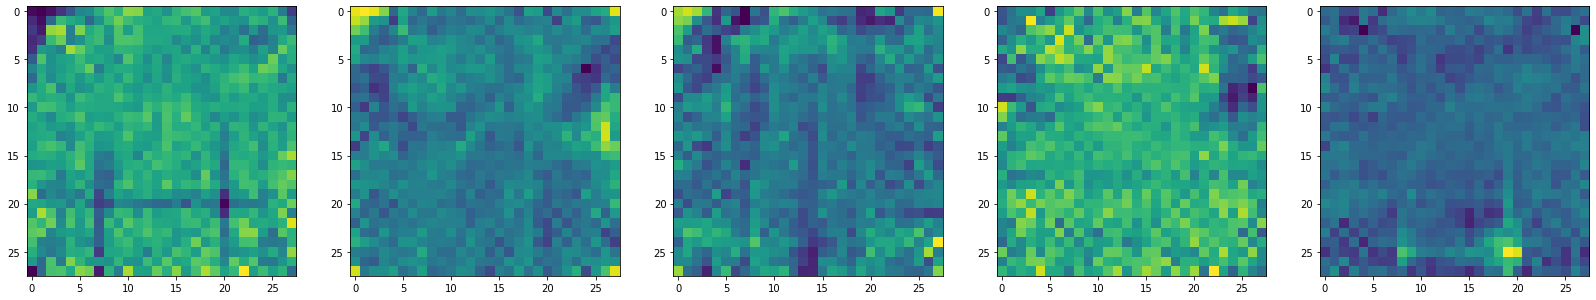

In [ ]:
from autoencoder_starter import Plot_Kernel
Plot_Kernel(autoencoder)

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


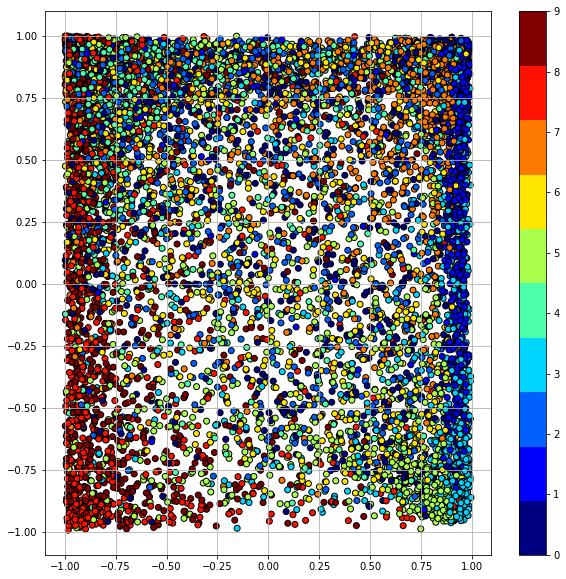

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


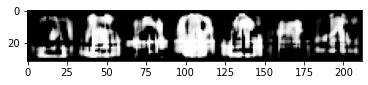

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


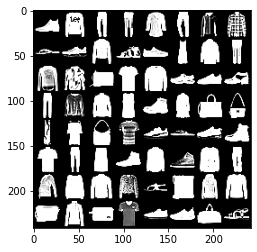

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


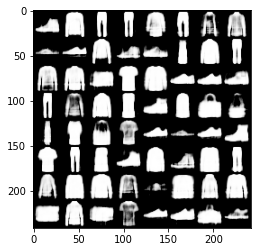

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

## **Part 3 - Added dropout noise**

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
class DAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(DAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784, out_features = dim_latent_representation), # no hidden layer 28*28 ->784
                  nn.Tanh() # tanh activation function
                )
                
            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784))) # no hidden layer 28*28 ->784
                return encoded_x
            
        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = dim_latent_representation, out_features = 784), # no hidden layer 28*28 ->784
                  nn.Tanh()
                )
                
            def forward(self, z):
                # needs your implementation
                decoded_z = self.layers(z)
                one_d_z = decoded_z.shape[0]
                output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
                return output_img
            
        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    def add_noise(self, x, noise_type):
      if noise_type=='Gaussian':
        # return (x with Gaussian noise)
        noise_factor = 0.1**0.5
        gaussian = noise_factor*torch.randn_like(x)
        noisy_x = x + gaussian
        return noisy_x
      elif noise_type=='Dropout':
        # return (x with Dropout noise)
        dropout = nn.Dropout(p=0.2)
        noisy_x = dropout(x)
        return noisy_x

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        #dropout noise: turning some of inoput values to zero
        x = self.add_noise(x,'Dropout')
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = DAE(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:16<00:00, 112.05it/s]

====> Epoch: 1 Average loss: 0.6193



100%|██████████| 313/313 [00:02<00:00, 130.17it/s]

====> Val set loss (reconstruction error) : 0.5500



100%|██████████| 1875/1875 [00:16<00:00, 112.04it/s]

====> Epoch: 2 Average loss: 0.5421



100%|██████████| 313/313 [00:02<00:00, 127.85it/s]

====> Val set loss (reconstruction error) : 0.5351



100%|██████████| 1875/1875 [00:16<00:00, 112.13it/s]

====> Epoch: 3 Average loss: 0.5336



100%|██████████| 313/313 [00:02<00:00, 130.19it/s]

====> Val set loss (reconstruction error) : 0.5299



100%|██████████| 1875/1875 [00:16<00:00, 112.06it/s]

====> Epoch: 4 Average loss: 0.5301



100%|██████████| 313/313 [00:02<00:00, 127.91it/s]

====> Val set loss (reconstruction error) : 0.5276



100%|██████████| 1875/1875 [00:16<00:00, 111.39it/s]

====> Epoch: 5 Average loss: 0.5282



100%|██████████| 313/313 [00:02<00:00, 129.28it/s]

====> Val set loss (reconstruction error) : 0.5265



100%|██████████| 1875/1875 [00:16<00:00, 110.85it/s]

====> Epoch: 6 Average loss: 0.5275



100%|██████████| 313/313 [00:02<00:00, 129.44it/s]

====> Val set loss (reconstruction error) : 0.5260



100%|██████████| 1875/1875 [00:16<00:00, 111.17it/s]

====> Epoch: 7 Average loss: 0.5269



100%|██████████| 313/313 [00:02<00:00, 128.79it/s]

====> Val set loss (reconstruction error) : 0.5256



100%|██████████| 1875/1875 [00:17<00:00, 105.73it/s]

====> Epoch: 8 Average loss: 0.5266



100%|██████████| 313/313 [00:02<00:00, 127.94it/s]

====> Val set loss (reconstruction error) : 0.5250



100%|██████████| 1875/1875 [00:16<00:00, 111.36it/s]

====> Epoch: 9 Average loss: 0.5263



100%|██████████| 313/313 [00:02<00:00, 128.31it/s]

====> Val set loss (reconstruction error) : 0.5254



100%|██████████| 1875/1875 [00:16<00:00, 110.70it/s]

====> Epoch: 10 Average loss: 0.5262



100%|██████████| 313/313 [00:02<00:00, 125.06it/s]

====> Val set loss (reconstruction error) : 0.5247



100%|██████████| 1875/1875 [00:16<00:00, 110.93it/s]

====> Epoch: 11 Average loss: 0.5261



100%|██████████| 313/313 [00:02<00:00, 128.23it/s]

====> Val set loss (reconstruction error) : 0.5251



100%|██████████| 1875/1875 [00:16<00:00, 112.40it/s]

====> Epoch: 12 Average loss: 0.5259



100%|██████████| 313/313 [00:02<00:00, 128.80it/s]

====> Val set loss (reconstruction error) : 0.5245



100%|██████████| 1875/1875 [00:16<00:00, 112.61it/s]

====> Epoch: 13 Average loss: 0.5257



100%|██████████| 313/313 [00:02<00:00, 128.74it/s]

====> Val set loss (reconstruction error) : 0.5246



100%|██████████| 1875/1875 [00:16<00:00, 111.32it/s]

====> Epoch: 14 Average loss: 0.5257



100%|██████████| 313/313 [00:02<00:00, 128.42it/s]

====> Val set loss (reconstruction error) : 0.5238



100%|██████████| 1875/1875 [00:16<00:00, 111.66it/s]

====> Epoch: 15 Average loss: 0.5256



100%|██████████| 313/313 [00:02<00:00, 129.26it/s]

====> Val set loss (reconstruction error) : 0.5249



100%|██████████| 1875/1875 [00:16<00:00, 111.59it/s]

====> Epoch: 16 Average loss: 0.5257



100%|██████████| 313/313 [00:02<00:00, 129.80it/s]

====> Val set loss (reconstruction error) : 0.5243



100%|██████████| 1875/1875 [00:16<00:00, 112.25it/s]

====> Epoch: 17 Average loss: 0.5256



100%|██████████| 313/313 [00:02<00:00, 130.91it/s]

====> Val set loss (reconstruction error) : 0.5246



100%|██████████| 1875/1875 [00:16<00:00, 111.53it/s]

====> Epoch: 18 Average loss: 0.5256



100%|██████████| 313/313 [00:02<00:00, 126.97it/s]

====> Val set loss (reconstruction error) : 0.5248



100%|██████████| 1875/1875 [00:16<00:00, 110.58it/s]

====> Epoch: 19 Average loss: 0.5254



100%|██████████| 313/313 [00:02<00:00, 126.70it/s]

====> Val set loss (reconstruction error) : 0.5236



100%|██████████| 1875/1875 [00:16<00:00, 110.93it/s]

====> Epoch: 20 Average loss: 0.5254



100%|██████████| 313/313 [00:02<00:00, 128.58it/s]

====> Val set loss (reconstruction error) : 0.5244


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


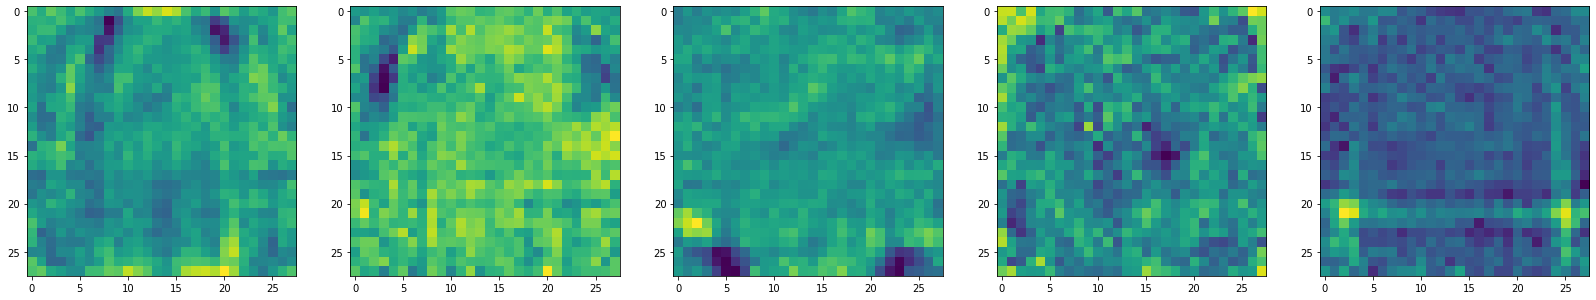

In [ ]:
from autoencoder_starter import Plot_Kernel
Plot_Kernel(autoencoder)

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


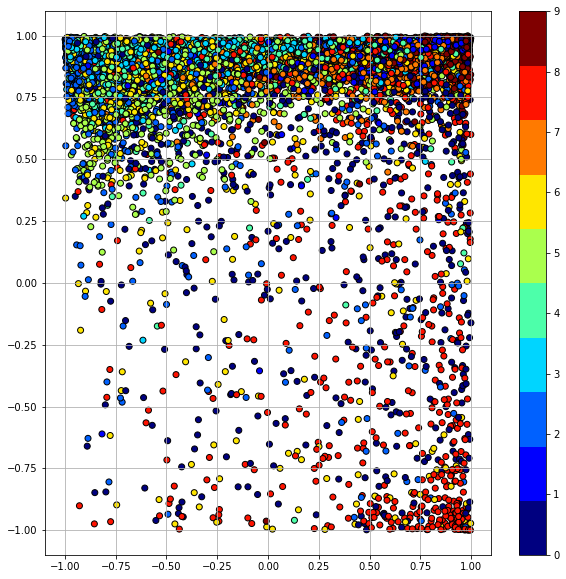

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


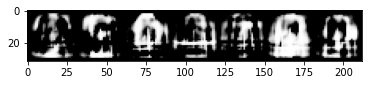

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


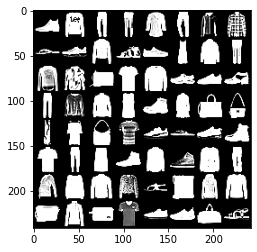

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


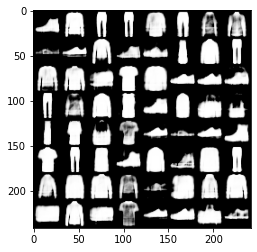

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

## **Part 3 - Added Gaussian Noise**

We recommend running this notebook on Google Colab to avoid having to install PyTorch and to take advantage of GPUs, which make training faster.

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /./data/FashionMNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
class DAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(DAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784, out_features = dim_latent_representation), # no hidden layer 28*28 ->784
                  nn.Tanh() # tanh activation function
                )
                
            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784))) # no hidden layer 28*28 ->784
                return encoded_x
            
        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = dim_latent_representation, out_features = 784), # no hidden layer 28*28 ->784
                  nn.Tanh()
                )
                
            def forward(self, z):
                # needs your implementation
                decoded_z = self.layers(z)
                one_d_z = decoded_z.shape[0]
                output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
                return output_img
            
        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    def add_noise(self, x, noise_type):
      if noise_type=='Gaussian':
        # return (x with Gaussian noise)
        noise_factor = 0.1**0.5
        gaussian = noise_factor*torch.randn_like(x)
        noisy_x = x + gaussian
        return noisy_x
      elif noise_type=='Dropout':
        # return (x with Dropout noise)
        dropout = nn.Dropout(p=0.2)
        noisy_x = dropout(x)
        return noisy_x

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu
    

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        # Gaussian noise
        x = self.add_noise(x,'Gaussian')
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = DAE(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:19<00:00, 95.59it/s] 

====> Epoch: 1 Average loss: 0.6174



100%|██████████| 313/313 [00:02<00:00, 111.78it/s]

====> Val set loss (reconstruction error) : 0.5468



100%|██████████| 1875/1875 [00:19<00:00, 97.37it/s]

====> Epoch: 2 Average loss: 0.5389



100%|██████████| 313/313 [00:02<00:00, 109.54it/s]

====> Val set loss (reconstruction error) : 0.5320



100%|██████████| 1875/1875 [00:19<00:00, 97.15it/s]

====> Epoch: 3 Average loss: 0.5292



100%|██████████| 313/313 [00:02<00:00, 109.30it/s]

====> Val set loss (reconstruction error) : 0.5278



100%|██████████| 1875/1875 [00:19<00:00, 95.61it/s]

====> Epoch: 4 Average loss: 0.5255



100%|██████████| 313/313 [00:02<00:00, 112.79it/s]

====> Val set loss (reconstruction error) : 0.5246



100%|██████████| 1875/1875 [00:19<00:00, 96.21it/s]

====> Epoch: 5 Average loss: 0.5236



100%|██████████| 313/313 [00:02<00:00, 110.25it/s]

====> Val set loss (reconstruction error) : 0.5224



100%|██████████| 1875/1875 [00:19<00:00, 96.12it/s]

====> Epoch: 6 Average loss: 0.5227



100%|██████████| 313/313 [00:02<00:00, 106.17it/s]

====> Val set loss (reconstruction error) : 0.5215



100%|██████████| 1875/1875 [00:19<00:00, 95.74it/s] 

====> Epoch: 7 Average loss: 0.5222



100%|██████████| 313/313 [00:02<00:00, 110.18it/s]

====> Val set loss (reconstruction error) : 0.5216



100%|██████████| 1875/1875 [00:19<00:00, 95.81it/s] 

====> Epoch: 8 Average loss: 0.5217



100%|██████████| 313/313 [00:02<00:00, 108.85it/s]

====> Val set loss (reconstruction error) : 0.5220



100%|██████████| 1875/1875 [00:19<00:00, 95.84it/s]

====> Epoch: 9 Average loss: 0.5215



100%|██████████| 313/313 [00:02<00:00, 109.62it/s]

====> Val set loss (reconstruction error) : 0.5209



100%|██████████| 1875/1875 [00:19<00:00, 95.90it/s] 

====> Epoch: 10 Average loss: 0.5212



100%|██████████| 313/313 [00:02<00:00, 106.88it/s]

====> Val set loss (reconstruction error) : 0.5206



100%|██████████| 1875/1875 [00:19<00:00, 95.92it/s]

====> Epoch: 11 Average loss: 0.5210



100%|██████████| 313/313 [00:02<00:00, 108.05it/s]

====> Val set loss (reconstruction error) : 0.5203



100%|██████████| 1875/1875 [00:19<00:00, 95.78it/s]

====> Epoch: 12 Average loss: 0.5207



100%|██████████| 313/313 [00:02<00:00, 108.76it/s]

====> Val set loss (reconstruction error) : 0.5212



100%|██████████| 1875/1875 [00:19<00:00, 94.18it/s]

====> Epoch: 13 Average loss: 0.5206



100%|██████████| 313/313 [00:02<00:00, 108.84it/s]

====> Val set loss (reconstruction error) : 0.5208



100%|██████████| 1875/1875 [00:19<00:00, 94.51it/s]

====> Epoch: 14 Average loss: 0.5204



100%|██████████| 313/313 [00:02<00:00, 110.61it/s]

====> Val set loss (reconstruction error) : 0.5216



100%|██████████| 1875/1875 [00:19<00:00, 95.33it/s]

====> Epoch: 15 Average loss: 0.5204



100%|██████████| 313/313 [00:02<00:00, 107.51it/s]

====> Val set loss (reconstruction error) : 0.5217



100%|██████████| 1875/1875 [00:19<00:00, 95.54it/s] 

====> Epoch: 16 Average loss: 0.5204



100%|██████████| 313/313 [00:02<00:00, 109.58it/s]

====> Val set loss (reconstruction error) : 0.5214



100%|██████████| 1875/1875 [00:19<00:00, 93.92it/s] 

====> Epoch: 17 Average loss: 0.5203



100%|██████████| 313/313 [00:02<00:00, 109.16it/s]

====> Val set loss (reconstruction error) : 0.5212



100%|██████████| 1875/1875 [00:19<00:00, 94.21it/s]

====> Epoch: 18 Average loss: 0.5201



100%|██████████| 313/313 [00:02<00:00, 106.36it/s]

====> Val set loss (reconstruction error) : 0.5208



100%|██████████| 1875/1875 [00:19<00:00, 95.14it/s] 

====> Epoch: 19 Average loss: 0.5201



100%|██████████| 313/313 [00:02<00:00, 105.55it/s]

====> Val set loss (reconstruction error) : 0.5202



100%|██████████| 1875/1875 [00:19<00:00, 94.88it/s]

====> Epoch: 20 Average loss: 0.5201



100%|██████████| 313/313 [00:02<00:00, 110.09it/s]

====> Val set loss (reconstruction error) : 0.5212


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


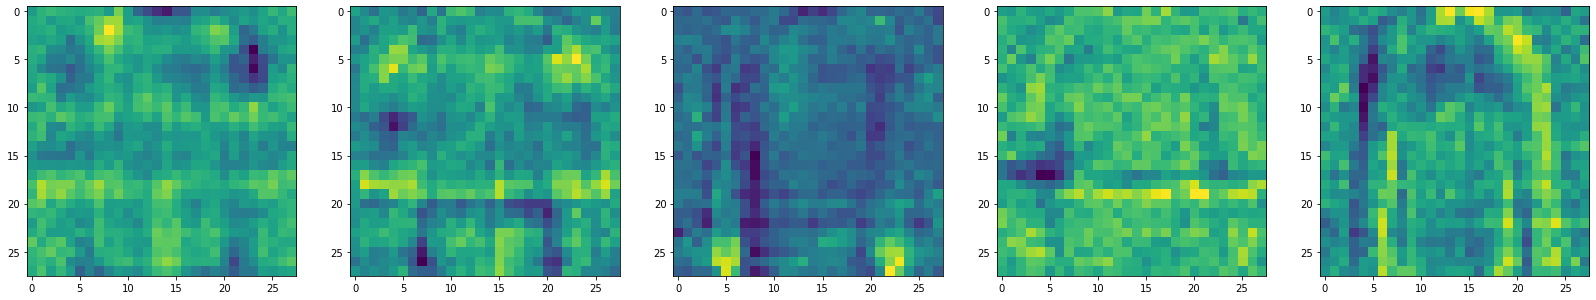

In [ ]:
from autoencoder_starter import Plot_Kernel
Plot_Kernel(autoencoder)

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


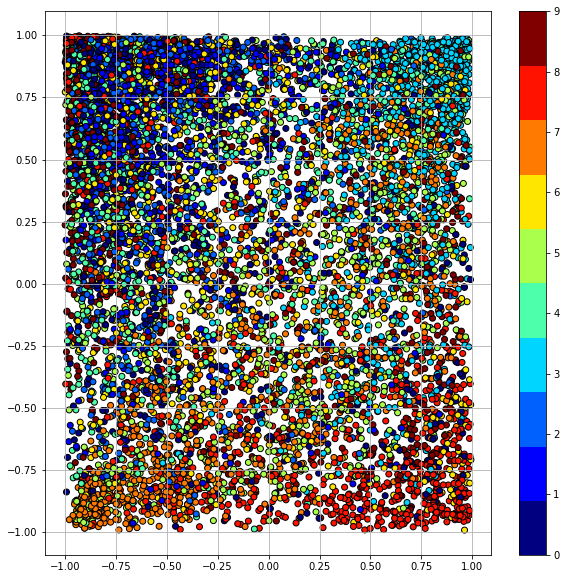

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


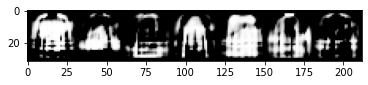

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


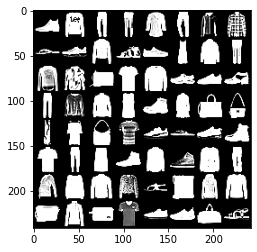

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


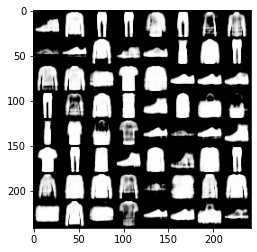

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

## **Part 4 - VAE**

## Load packages

In [ ]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [ ]:
dim_latent_representation = 30
class VAE(nn.Module):

    def __init__(self,dim_latent_representation=2):
        super(VAE,self).__init__()


        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                  nn.Linear(in_features = 784,  out_features = dim_latent_representation*2),
                  nn.Tanh()
                )


            def forward(self, x):
                # needs your implementation
                one_d_x = x.shape[0]
                encoded_x = self.layers(torch.reshape(x,(one_d_x, 784)))
                #encoded_x = self.layers(x)
                return encoded_x


        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.layers = nn.Sequential(
                    nn.Linear(in_features = dim_latent_representation, out_features = 784), # change to 1 decoder
                    nn.Tanh()
                )


            def forward(self, z):
              # needs your implementation
              decoded_z = self.layers(z)
              one_d_z = decoded_z.shape[0]
              output_img = torch.reshape(decoded_z,(one_d_z,1,28,28))
              return output_img
              #return decoded_z

        self.decoder = Decoder(input_size=dim_latent_representation)
        self.encoder = Encoder(output_size=dim_latent_representation)
        

    # Implement this function for the VAE model
    def reparameterise(self, mu, logvar):
      if self.training:
        # return reparametrized mu
        standard_deviation = torch.exp(0.5*logvar)
        epsilon  = torch.randn_like(standard_deviation)
        reparametrized_mu = mu + (epsilon * standard_deviation) 
        return reparametrized_mu
      else:
        return mu

    def forward(self, x):
        # This function should be modified for the DAE and VAE
        #x = F.tanh(self.encoder.encoder1(x))
        x = self.encoder(x).view(-1, 2, dim_latent_representation)
        mu = x[:, 0, :]
        logvar = x[:, 1, :]
        re_mu = self.reparameterise(mu, logvar)
        #x = F.tanh(self.decoder.decoder1(re_mu))
        # reconstruction = torch.sigmoid(self.decoder.decoder2(x))
        reconstruction = self.decoder(re_mu)
        # for the VAE forward function should also return mu and logvar
        return reconstruction, mu, logvar



## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
from VAE_starter import VAE_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 20 # the number of epochs and learning rate can be tuned.

autoencoder = VAE(dim_latent_representation=30)
trainer = VAE_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:18<00:00, 103.36it/s]

====> Epoch: 1 Average loss: 0.6994



100%|██████████| 313/313 [00:02<00:00, 122.14it/s]

====> Val set loss (reconstruction error) : 0.5955



100%|██████████| 1875/1875 [00:18<00:00, 101.84it/s]

====> Epoch: 2 Average loss: 0.6322



100%|██████████| 313/313 [00:02<00:00, 120.95it/s]

====> Val set loss (reconstruction error) : 0.5831



100%|██████████| 1875/1875 [00:18<00:00, 101.46it/s]

====> Epoch: 3 Average loss: 0.6253



100%|██████████| 313/313 [00:02<00:00, 124.94it/s]

====> Val set loss (reconstruction error) : 0.5791



100%|██████████| 1875/1875 [00:18<00:00, 101.15it/s]

====> Epoch: 4 Average loss: 0.6217



100%|██████████| 313/313 [00:02<00:00, 122.30it/s]

====> Val set loss (reconstruction error) : 0.5765



100%|██████████| 1875/1875 [00:19<00:00, 98.51it/s]

====> Epoch: 5 Average loss: 0.6197



100%|██████████| 313/313 [00:02<00:00, 118.33it/s]

====> Val set loss (reconstruction error) : 0.5765



100%|██████████| 1875/1875 [00:18<00:00, 101.24it/s]

====> Epoch: 6 Average loss: 0.6182



100%|██████████| 313/313 [00:02<00:00, 123.92it/s]

====> Val set loss (reconstruction error) : 0.5755



100%|██████████| 1875/1875 [00:18<00:00, 102.83it/s]

====> Epoch: 7 Average loss: 0.6174



100%|██████████| 313/313 [00:02<00:00, 123.48it/s]

====> Val set loss (reconstruction error) : 0.5749



100%|██████████| 1875/1875 [00:18<00:00, 100.98it/s]

====> Epoch: 8 Average loss: 0.6168



100%|██████████| 313/313 [00:02<00:00, 124.51it/s]

====> Val set loss (reconstruction error) : 0.5752



100%|██████████| 1875/1875 [00:18<00:00, 101.48it/s]

====> Epoch: 9 Average loss: 0.6164



100%|██████████| 313/313 [00:02<00:00, 122.12it/s]

====> Val set loss (reconstruction error) : 0.5752



100%|██████████| 1875/1875 [00:18<00:00, 102.67it/s]

====> Epoch: 10 Average loss: 0.6163



100%|██████████| 313/313 [00:02<00:00, 123.78it/s]

====> Val set loss (reconstruction error) : 0.5750



100%|██████████| 1875/1875 [00:18<00:00, 100.33it/s]

====> Epoch: 11 Average loss: 0.6156



100%|██████████| 313/313 [00:02<00:00, 121.89it/s]

====> Val set loss (reconstruction error) : 0.5748



100%|██████████| 1875/1875 [00:18<00:00, 101.35it/s]

====> Epoch: 12 Average loss: 0.6153



100%|██████████| 313/313 [00:02<00:00, 120.75it/s]

====> Val set loss (reconstruction error) : 0.5738



100%|██████████| 1875/1875 [00:18<00:00, 101.31it/s]

====> Epoch: 13 Average loss: 0.6154



100%|██████████| 313/313 [00:02<00:00, 124.33it/s]

====> Val set loss (reconstruction error) : 0.5754



100%|██████████| 1875/1875 [00:18<00:00, 102.29it/s]

====> Epoch: 14 Average loss: 0.6156



100%|██████████| 313/313 [00:02<00:00, 122.79it/s]

====> Val set loss (reconstruction error) : 0.5739



100%|██████████| 1875/1875 [00:18<00:00, 102.69it/s]

====> Epoch: 15 Average loss: 0.6155



100%|██████████| 313/313 [00:02<00:00, 123.48it/s]

====> Val set loss (reconstruction error) : 0.5735



100%|██████████| 1875/1875 [00:18<00:00, 100.15it/s]

====> Epoch: 16 Average loss: 0.6155



100%|██████████| 313/313 [00:02<00:00, 120.10it/s]

====> Val set loss (reconstruction error) : 0.5738



100%|██████████| 1875/1875 [00:18<00:00, 101.15it/s]

====> Epoch: 17 Average loss: 0.6152



100%|██████████| 313/313 [00:02<00:00, 119.94it/s]

====> Val set loss (reconstruction error) : 0.5751



100%|██████████| 1875/1875 [00:18<00:00, 101.05it/s]

====> Epoch: 18 Average loss: 0.6152



100%|██████████| 313/313 [00:02<00:00, 124.09it/s]

====> Val set loss (reconstruction error) : 0.5726



100%|██████████| 1875/1875 [00:18<00:00, 101.02it/s]

====> Epoch: 19 Average loss: 0.6151



100%|██████████| 313/313 [00:02<00:00, 115.04it/s]

====> Val set loss (reconstruction error) : 0.5725



100%|██████████| 1875/1875 [00:20<00:00, 92.41it/s]

====> Epoch: 20 Average loss: 0.6155



100%|██████████| 313/313 [00:03<00:00, 94.37it/s]

====> Val set loss (reconstruction error) : 0.5750


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

Mounted at /content/gdrive


## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


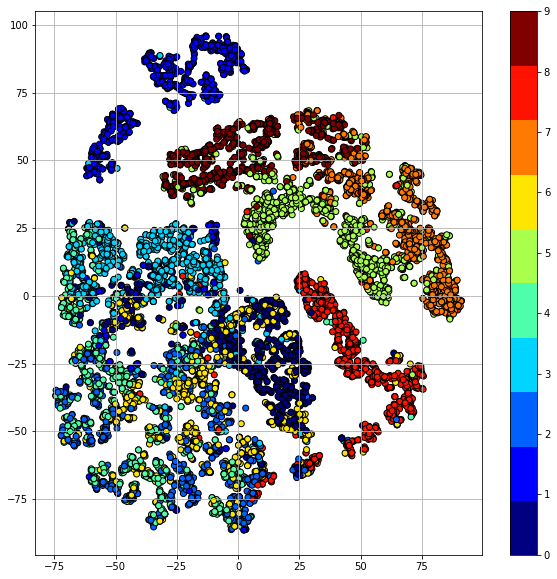

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        #x = x.reshape (-1,784) #check
        x = model.encoder(x.to(trainer.device)).view(-1, 2, dim_latent_representation)
        mu = x[:, 0, :]
        logvar = x[:, 1, :]
        z_ = model.reparameterise(mu, logvar)
        #z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from VAE_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


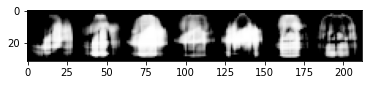

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from VAE_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


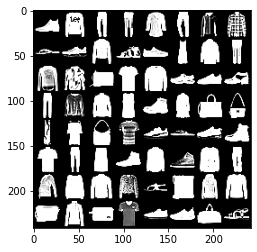

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from VAE_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


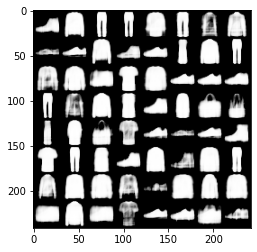

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device)
    images = images.reshape (-1,784) #check
    reconstructed = trainer.model(images)[0].cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)